# EDA on Haberman Survival Dataset

## Haberman's Suvival Dataset:

## Reference :
https://www.kaggle.com/gilsousa/habermans-survival-data-set



## Informations about dataset :
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attribute Information :
1)Age of patient at time of operation (numerical)

2)Patient's year of operation (year - 1900, numerical)

3)Number of positive axillary nodes detected (numerical)

4)Survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year

## Objective :
To predict Whether a patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column = ['patient_age', 'year_of_operation', 'positive_axillary_nodes', 'survival_status']
haberman = pd.read_csv("haberman.csv",names=column)
haberman.head()

,patient_age,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
print("number of data points and features:")
print(haberman.shape)



number of data points and features:
(306, 4)


In [19]:
print("number of data points per class:")
haberman["survival_status"].value_counts()

number of data points per class:


1    225
2     81
Name: survival_status, dtype: int64

# Observation:
1) There are two classes 1 and 2 , class 1 corresponds to patients who survived 5 years or longer after the operation and class 2 corresponds to patients who died within 5 years of operation.

2) class 1 contains 225 values and class 2 contain 81 values , since the number of values in each class differ substantially the dataset is imbalanced.

In [24]:
haberman_survived = haberman.loc[haberman["survival_status"]==1]
haberman_died = haberman.loc[haberman["survival_status"]==2]


print("Basic statistics about patients who survived 5 years or longer after operation:")
haberman_survived.describe()

Basic statistics about patients who survived 5 years or longer after operation:


,patient_age,year_of_operation,positive_axillary_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [26]:
print("Basic statistics about patients who died within 5 years of operation:")
haberman_died.describe()

Basic statistics about patients who died within 5 years of operation:


,patient_age,year_of_operation,positive_axillary_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0



# Observations:
1) The statistics about age and year of operation of both the classes are almost similar , the only parameter which varies marginally is the number of positive axillary nodes.

2) About 75% of survived patients had positive axillary nodes less than or equal to 3 and 75% of patients who died had positive axillary nodes less than or equal to 11 .Thus the parameter which varies the most in the above statistics is the number of positive axillary nodes. The patient with less number of positive axillary nodes has higher chance of survival.

3) Number of positive axillary nodes alone is not suitable in determining the survival of patient as there are cases where the patient died within 5 years of operation even when she had no positive axillary nodes(minimum number of postivie axillary nodes for died patient is 0)


# Univariate Analysis based on different features
## 1. Patient_age
### 1.1 Histogram with PDF

C:\Users\prahallad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


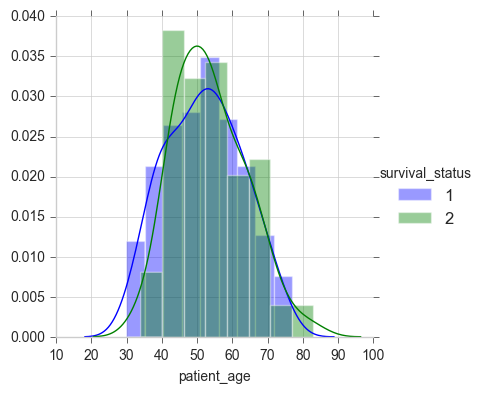

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="survival_status",height=4) \
   .map(sns.distplot,"patient_age")\
   .add_legend();
plt.show();  

### 1.2 PDF and CDF plot

[ 0.02222222  0.03111111  0.04444444  0.06222222  0.04444444  0.08        0.04
  0.05333333  0.09777778  0.06666667  0.07555556  0.08888889  0.04888889
  0.04444444  0.08        0.03111111  0.02222222  0.04        0.01333333
  0.01333333]
[ 30.    32.35  34.7   37.05  39.4   41.75  44.1   46.45  48.8   51.15
  53.5   55.85  58.2   60.55  62.9   65.25  67.6   69.95  72.3   74.65  77.  ]
[ 0.02469136  0.01234568  0.04938272  0.07407407  0.12345679  0.07407407
  0.07407407  0.12345679  0.09876543  0.03703704  0.03703704  0.08641975
  0.04938272  0.04938272  0.03703704  0.01234568  0.01234568  0.01234568
  0.          0.01234568]
[ 34.    36.45  38.9   41.35  43.8   46.25  48.7   51.15  53.6   56.05
  58.5   60.95  63.4   65.85  68.3   70.75  73.2   75.65  78.1   80.55  83.  ]


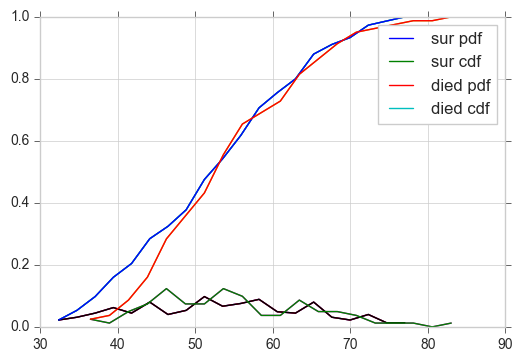

In [39]:
counts,bin_edges = np.histogram(haberman_survived["patient_age"],bins = 20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(haberman_died["patient_age"],bins = 20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["sur pdf","sur cdf","died pdf","died cdf"])

plt.show()

### 1.3 Box Plot

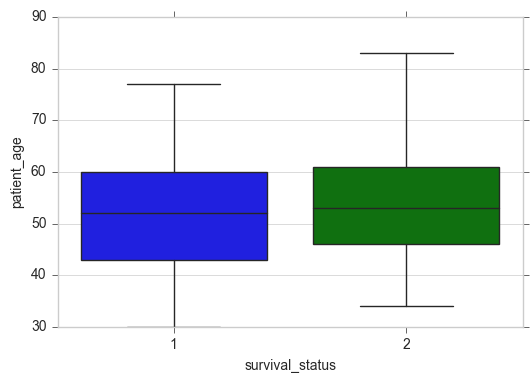

In [42]:
sns.boxplot(x="survival_status",y="patient_age",data=haberman)
plt.show()

### 1.4 Violin Plot

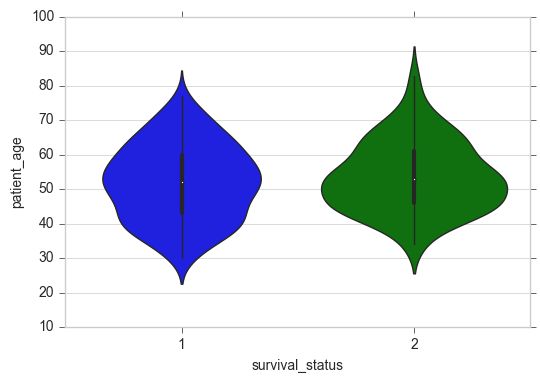

In [43]:
sns.violinplot(x="survival_status",y="patient_age",data=haberman)
plt.show()


# Observation:
1) Univariate analysis on patient_age give similar plots for both class

2) Huge overlap and thus unble to differentiate the class based on the plots

2) Patient_age alone is not an important parameter in determining the survival of a patient

## 2. Year_of_operation
### 2.1 Histogram with PDF

C:\Users\prahallad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prahallad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


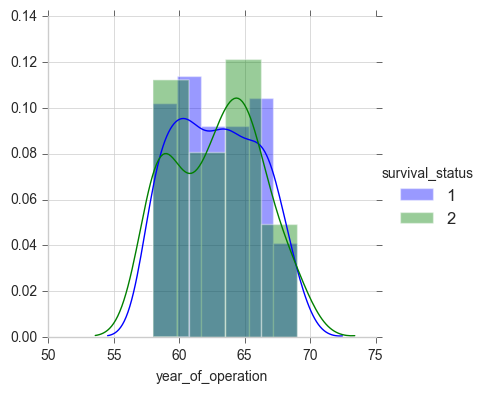

In [47]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="survival_status",size=4) \
   .map(sns.distplot,"year_of_operation") \
   .add_legend();
plt.show();


### 2.2 PDF and CDF plot

[ 0.10666667  0.08        0.          0.10666667  0.          0.10222222
  0.          0.07111111  0.          0.09777778  0.10222222  0.
  0.06666667  0.          0.09777778  0.          0.09333333  0.
  0.04444444  0.03111111]
[ 58.    58.55  59.1   59.65  60.2   60.75  61.3   61.85  62.4   62.95
  63.5   64.05  64.6   65.15  65.7   66.25  66.8   67.35  67.9   68.45  69.  ]
[ 0.14814815  0.11111111  0.          0.04938272  0.          0.03703704
  0.          0.08641975  0.          0.09876543  0.09876543  0.
  0.16049383  0.          0.07407407  0.          0.04938272  0.
  0.03703704  0.04938272]
[ 58.    58.55  59.1   59.65  60.2   60.75  61.3   61.85  62.4   62.95
  63.5   64.05  64.6   65.15  65.7   66.25  66.8   67.35  67.9   68.45  69.  ]


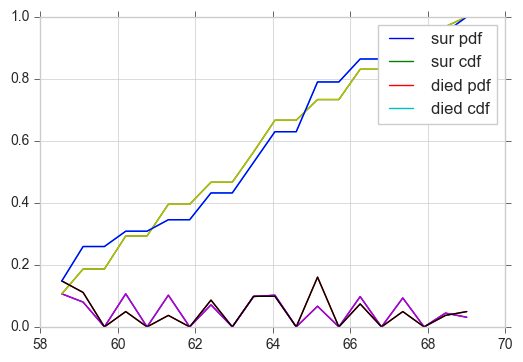

In [52]:
counts,bin_edges=np.histogram(haberman_survived["year_of_operation"],bins=20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haberman_died["year_of_operation"],bins=20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["sur pdf","sur cdf","died pdf","died cdf"])

plt.show()

### 2.3 Box Plot

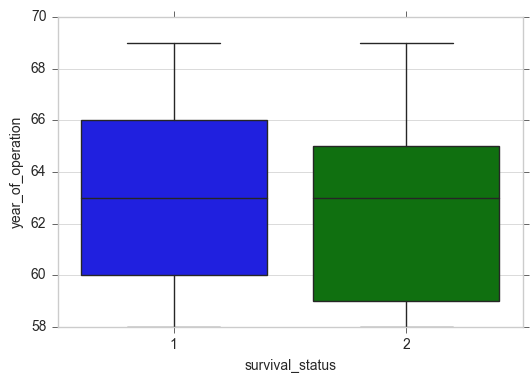

In [54]:
sns.boxplot(x="survival_status",y="year_of_operation",data=haberman)
plt.show()

### 2.4 Violin Plot

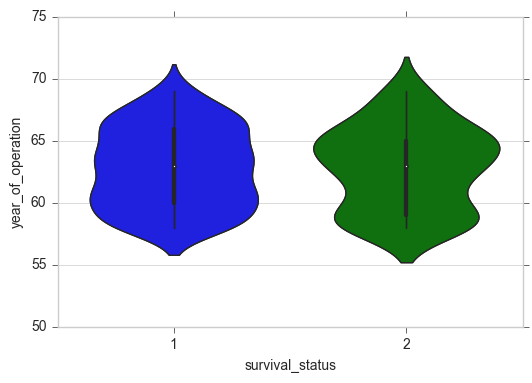

In [59]:
sns.violinplot(x="survival_status",y="year_of_operation",data=haberman)
plt.show()

# Observation:
1) univariate analysis based on Year_of_operation gives similar plots for both class with substantial overlap of data points

2) Year_of_operation is not an important feature for determining survival of a patient

## 3. positive_axillary_nodes
### 3.1 Histogram with PDF

C:\Users\prahallad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prahallad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


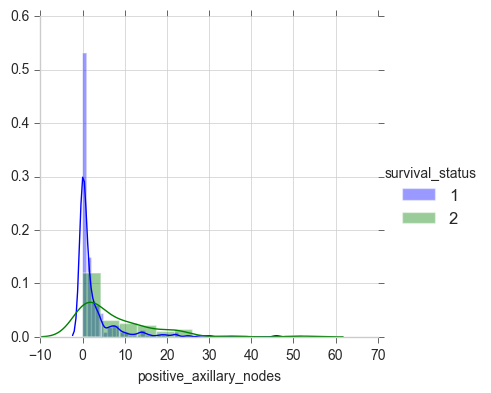

In [60]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="survival_status",size=4) \
   .map(sns.distplot,"positive_axillary_nodes") \
   .add_legend();
plt.show();

### 3.2 PDF and CDF

[ 0.73333333  0.10222222  0.02666667  0.05333333  0.01333333  0.00888889
  0.02222222  0.00444444  0.00888889  0.00888889  0.00444444  0.
  0.00444444  0.00444444  0.          0.          0.          0.          0.
  0.00444444]
[  0.    2.3   4.6   6.9   9.2  11.5  13.8  16.1  18.4  20.7  23.   25.3
  27.6  29.9  32.2  34.5  36.8  39.1  41.4  43.7  46. ]
[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]


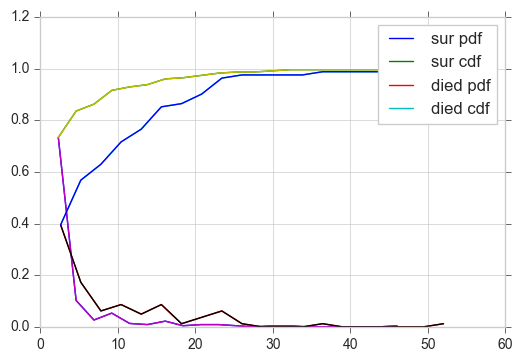

In [63]:
counts,bin_edges=np.histogram(haberman_survived["positive_axillary_nodes"],bins=20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haberman_died["positive_axillary_nodes"],bins=20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["sur pdf","sur cdf","died pdf","died cdf"])

plt.show()



### 3.3 Box Plot

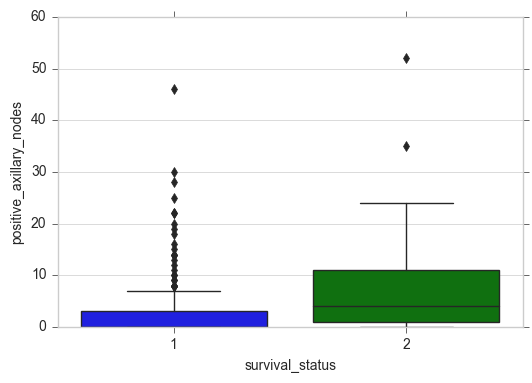

In [65]:
sns.boxplot(x="survival_status",y="positive_axillary_nodes",data=haberman)
plt.show()

### 3.4 Violin Plot

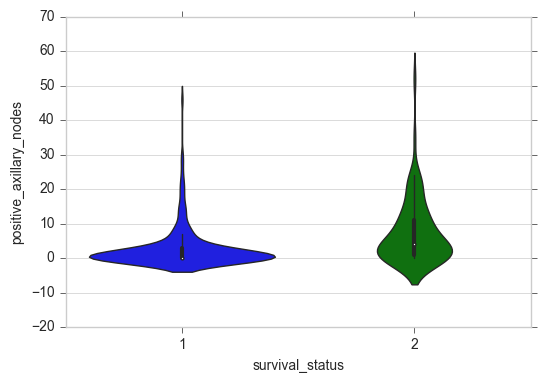

In [66]:
sns.violinplot(x="survival_status",y="positive_axillary_nodes",data=haberman)
plt.show()

# Observation
1) overlap of data points is less compared to other features, but overlap still exist thus it is difficult to set a threshold for positive axillary nodes which will differentiate both class of patients

2) About 50% of the patients who survived had no positive axillary nodes

3) As number of positive axillary nodes increase the chance of survival decreases

4) small percentage of patients who had no positive axillary nodes died within 5 years of operation , thus absence of positive axillary nodes cannot always guarente survival


## Bivariate Analysis
### Pair Plot

C:\Users\prahallad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


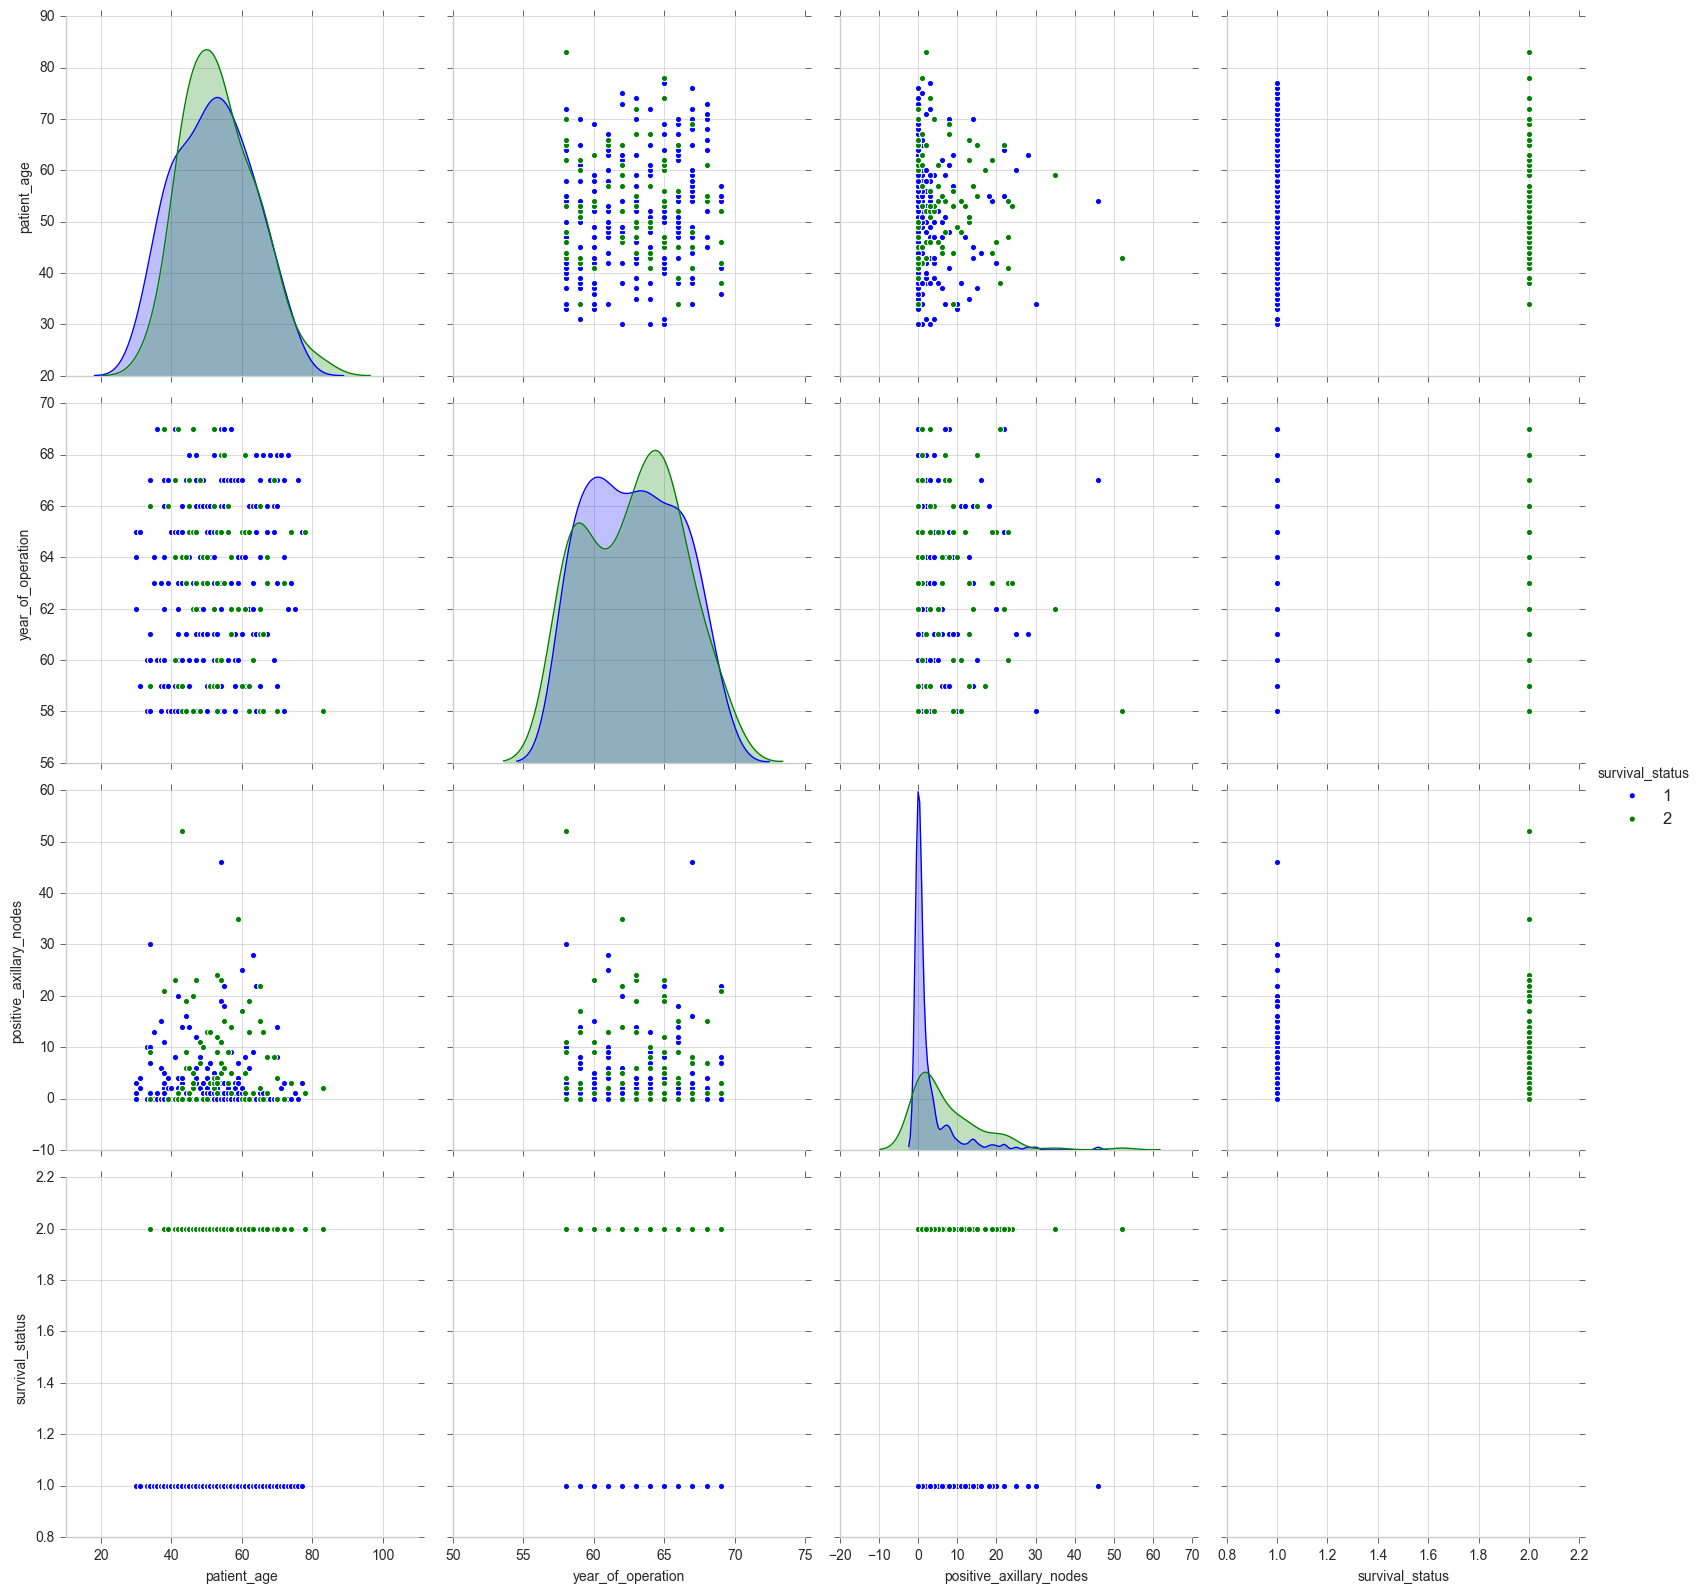

In [69]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="survival_status",height=4)
plt.show()


# Observation:
1) Axillary nodes doesn't depend on patients age

2) it is difficult to classify a patient based on his features

## Multivariate Analysis
### Contour Plot

C:\Users\prahallad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


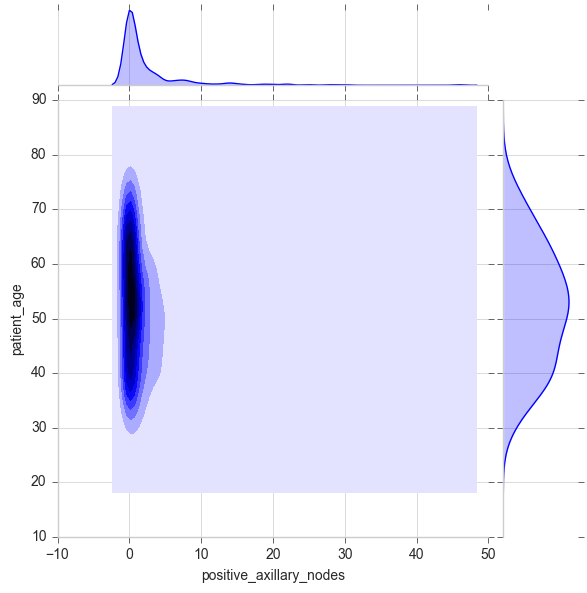

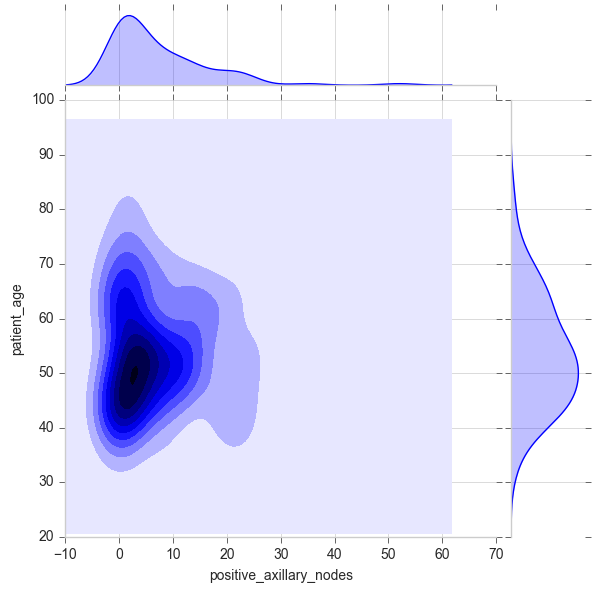

In [77]:
sns.jointplot(x="positive_axillary_nodes",y="patient_age",data=haberman_survived,kind="kde")
plt.show()

sns.jointplot(x="positive_axillary_nodes",y="patient_age",data=haberman_died,kind="kde")
plt.show()

## Observation:
1) no dependency between age and number of positive axillary nodes

### Conclusions:
1) Patient's age and Year of operation alone are not deciding factors for his/her survival.

2)As the number of positive axillary nodes increase the chance of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

3) Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got , the chance of misclassification is high.

3)The objective of classifying the survival status of a new patient based on given features is a difficuilt task.
